## Data Preparation

In [1]:
import numpy as np
import pandas as pd
from imputation import mean_impute, chk_missing, value_cap
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
directory = '/Users/antanas/GitRepo/PnuPred/PnuPred'

In [3]:
def import_data(directory):
    test = pd.read_csv(directory+'/PnuData/test_split.csv')
    train_val = pd.read_csv(directory+'/PnuData/train_val_split.csv')
    return test, train_val

In [34]:
test, train_val = import_data(directory)

### Quick Analysis

In [7]:
chk_missing(train_val)

False

In [35]:
train_val.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,734.000000,734.00000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,53.523161,132.06267,197.588556,0.232970,136.167575,0.873978,0.542234
std,9.421110,18.61849,108.979439,0.423012,25.334552,1.082222,0.498553
min,29.000000,0.00000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,47.000000,120.00000,172.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.00000,222.000000,0.000000,138.000000,0.500000,1.000000
75%,60.000000,140.00000,267.000000,0.000000,155.000000,1.500000,1.000000
max,77.000000,200.00000,529.000000,1.000000,195.000000,6.200000,1.000000


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

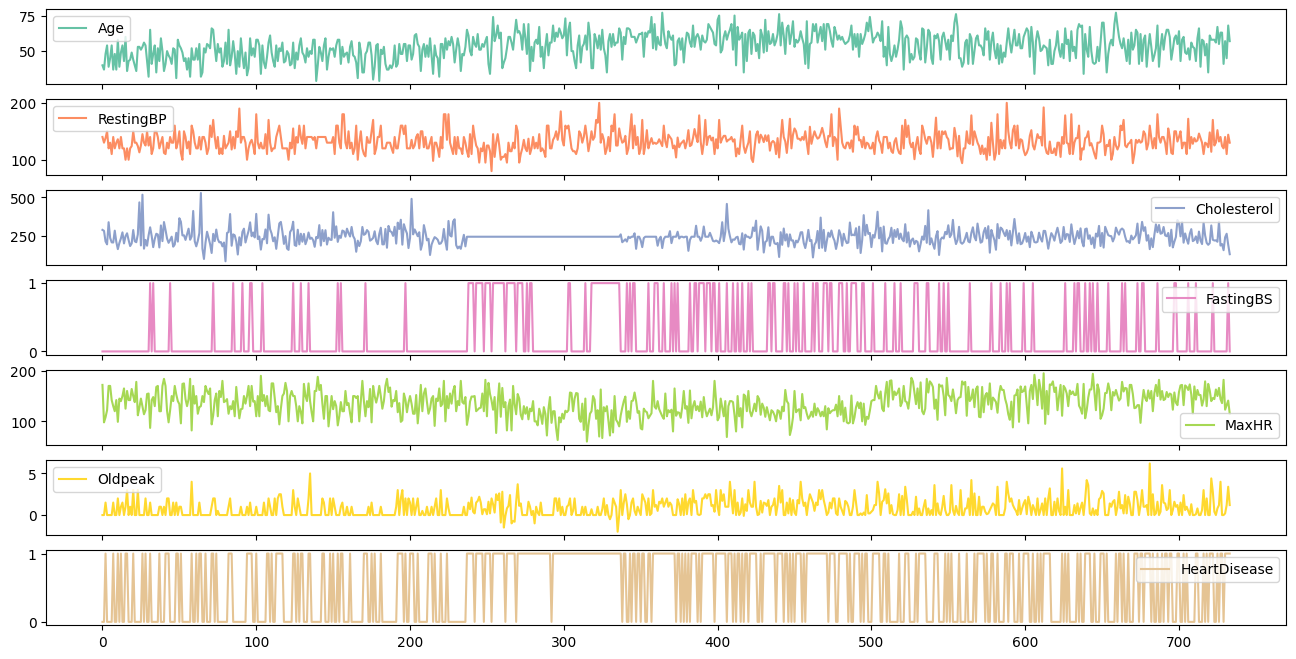

In [51]:
train_val.plot(subplots=True, figsize=(16, 8))

In [15]:
# Data Imputation of nonsensicle data
train_val = mean_impute(train_val, col = 'Cholesterol', threshold= 0.5)
train_val = mean_impute(train_val, col = 'RestingBP', threshold= 0.5)
train_val = mean_impute(train_val, col = 'Cholesterol', threshold= 300)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

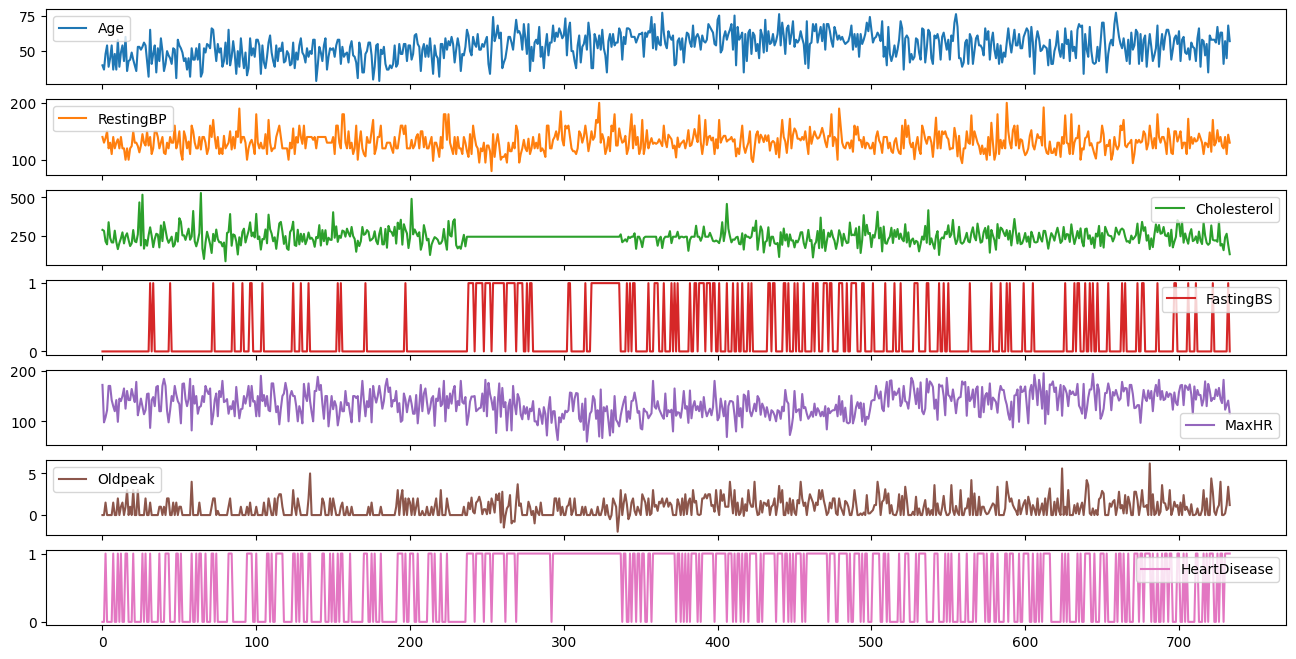

In [16]:
train_val.plot(subplots=True, figsize=(16, 8))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

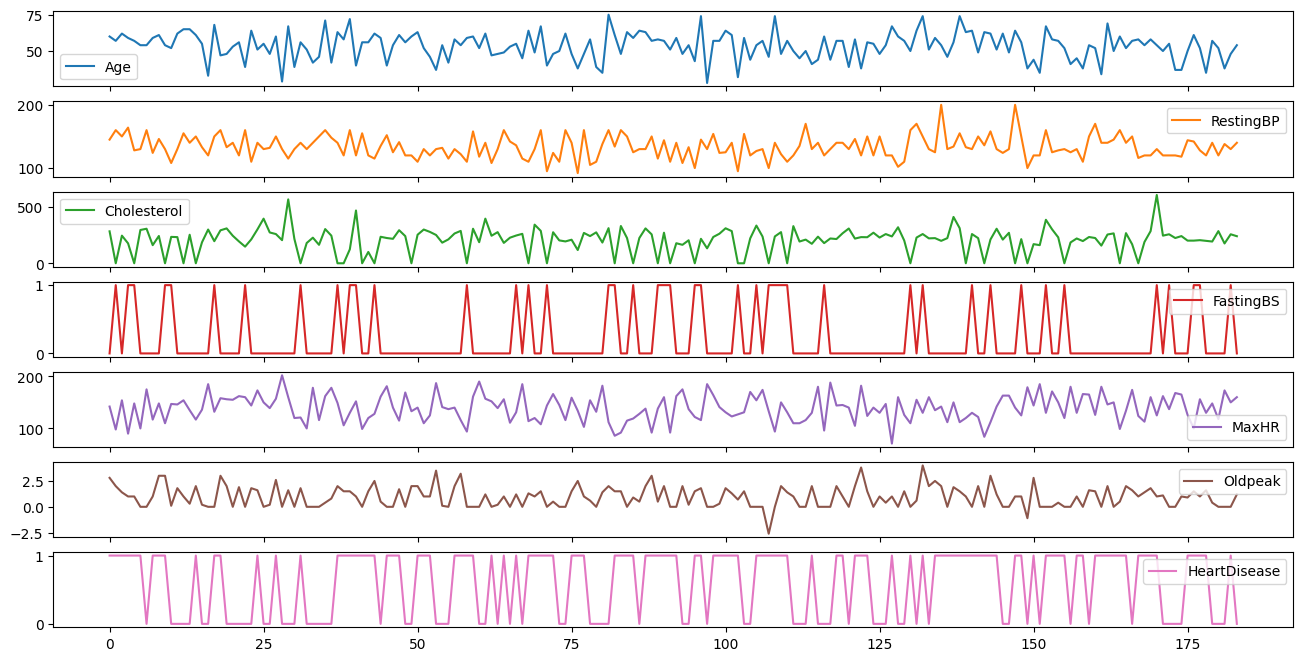

In [17]:
test.plot(subplots=True, figsize=(16, 8))

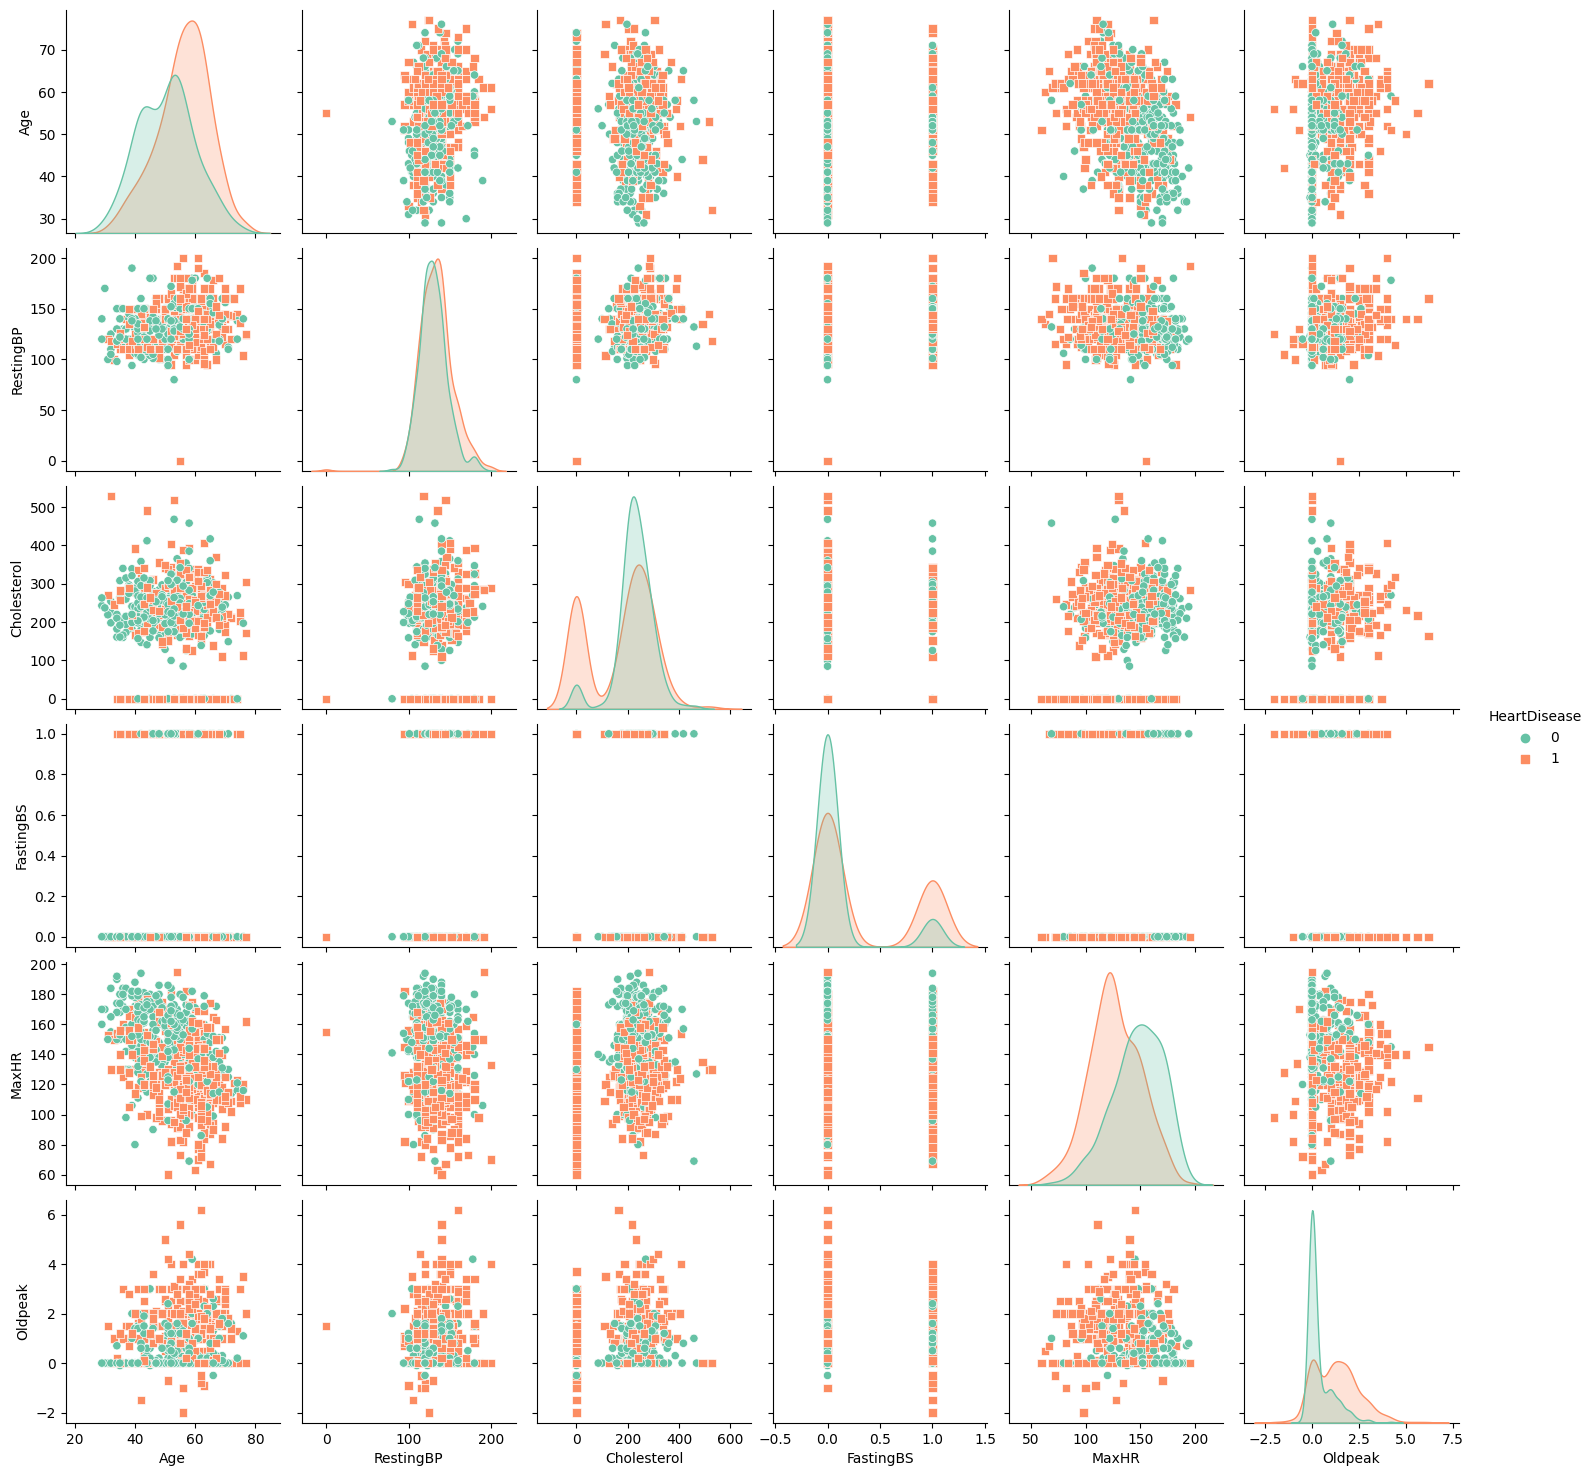

In [8]:
sns.set_palette('Set2')
plot = sns.pairplot(data = train_val, hue = 'HeartDisease', markers = ['o', 's'])

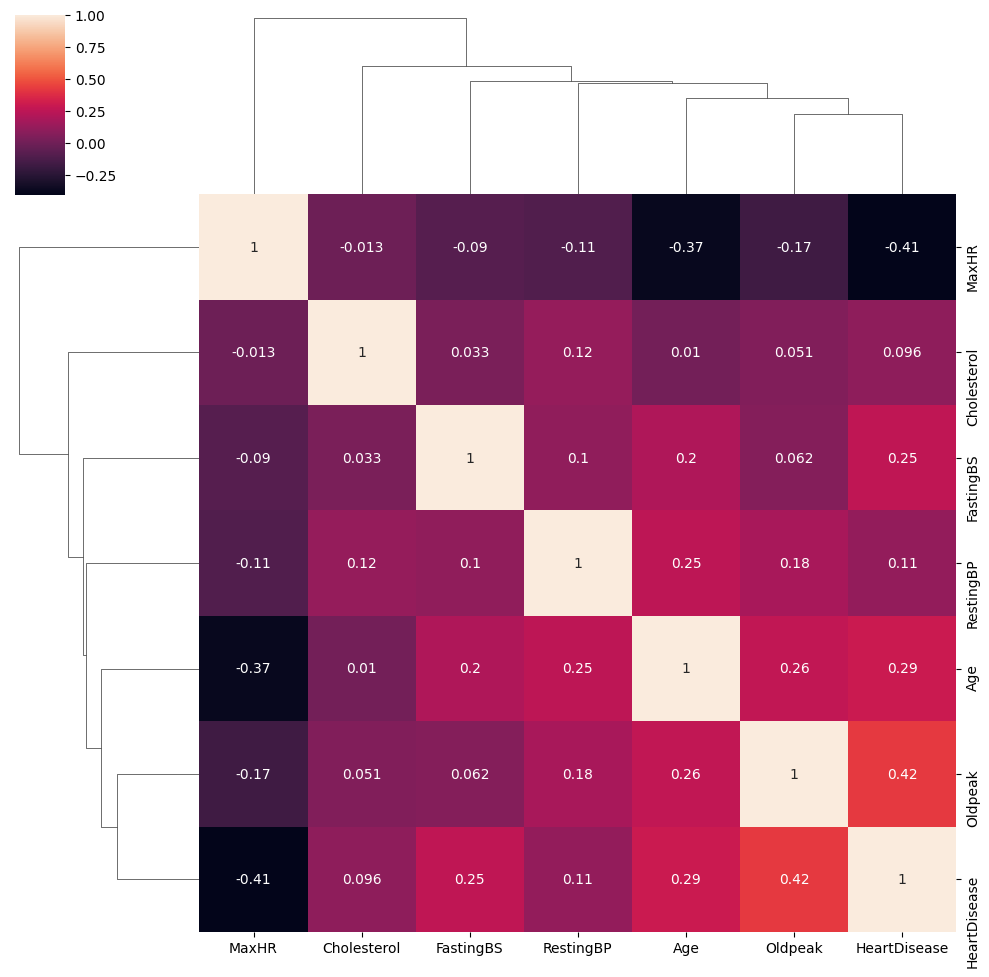

In [50]:
plot = sns.clustermap(data = train_val.corr(), annot = True)

In [36]:
train_val[['HeartDisease']].sum() # Balance

HeartDisease    398
dtype: int64